EDA USING STUDENT PEROFRMANCE DATASET

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

In [2]:
##Importing the student Dataset
df_main=pd.read_csv('StudentsPerformance.csv')

In [144]:
##Viewing the First 5 entrites
df_main.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
##Checking for Missing Values

In [145]:
df_main.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
## We have no Missing Vlaues Hence we can go ahead with Other Analysis

In [147]:
##Checking Value Counts
df_main.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [149]:
##Checking Data Types
df_main.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [150]:
##Checking Unique Values
df_main.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [152]:
##Checking for Duplicates
df_main.duplicated().sum()

0

In [153]:
##Checking Descriptive Stats
df_main.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [163]:
## Extracing catagorical features
cat_features=[features for features in df_main.columns if df_main[features].dtype=='O']

In [166]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [168]:
## Extracing numerical features
num_features=[features for features in df_main.columns if df_main[features].dtype!='O']

In [169]:
num_features

['math score', 'reading score', 'writing score']

In [172]:
##Imputing Total Score 
df_main['Total Score']=(df_main['math score']+df_main['reading score']+df_main['writing score'])

In [176]:
##Checking Mean Score Genderwise
df_main.groupby('gender')['Total Score'].mean()

gender
female    208.708494
male      197.512448
Name: Total Score, dtype: float64

In [177]:
##Converting into a DICT
grp_by_dict=df_main.groupby('gender')['Total Score'].mean().to_dict()

In [179]:
x=[i for i in grp_by_dict.keys()]

In [180]:
x

['female', 'male']

In [181]:
y=[i for i in grp_by_dict.values()]

In [182]:
y

[208.70849420849422, 197.5124481327801]

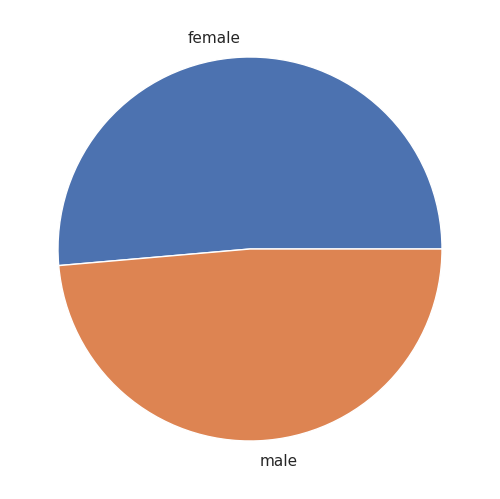

In [229]:
## Creating a Pie Chart
fig=mp.figure()
axes=fig.add_axes([0,0,1,1])
axes.pie(y,labels=x)
mp.show()

Text(0.5, 1.0, 'Scatter Plot of total vs math score seperated by gender')

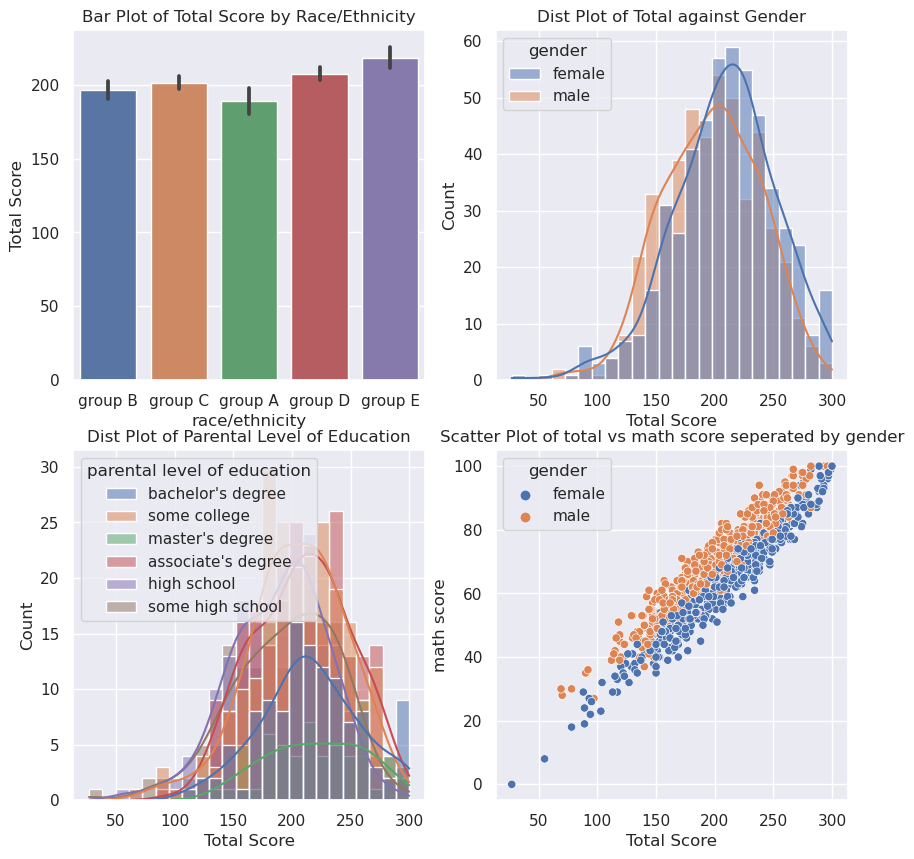

In [228]:
##Creating 4 Charts using seaborn and matplotlib
sns.set_theme()
fig,axes=mp.subplots(2,2,figsize=(10,10))
sns.barplot(data=df_main, x='race/ethnicity', y='Total Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Plot of Total Score by Race/Ethnicity')
sns.histplot(data=df_main,x='Total Score',ax=axes[0,1],kde=True,hue='gender')
axes[0,1].set_title('Dist Plot of Total against Gender')
sns.histplot(data=df_main,x='Total Score',ax=axes[1,0],kde=True,hue='parental level of education')
axes[1,0].set_title('Dist Plot of Parental Level of Education')
sns.scatterplot(data=df_main,x='Total Score',y='math score',hue='gender',ax=axes[1,1])
axes[1,1].set_title('Scatter Plot of total vs math score seperated by gender')
